<a href="https://colab.research.google.com/github/Gla2023/TrabajofinalElementosdeComputacion/blob/main/Trabajo_elementos_de_computaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dadas dos funciones lineales "Oferta" y "Demanda", se analiza el punto de equilibrio que representa el "Precio de equilibrio" que determina a su vez el exceso de oferta y demanda. Se muestran los resultados en un grafico.



Precio de equilibrio:3834.4495412844035
Exceso de oferta:141065.52899587573
Exceso de demanda: 141065.52899587573


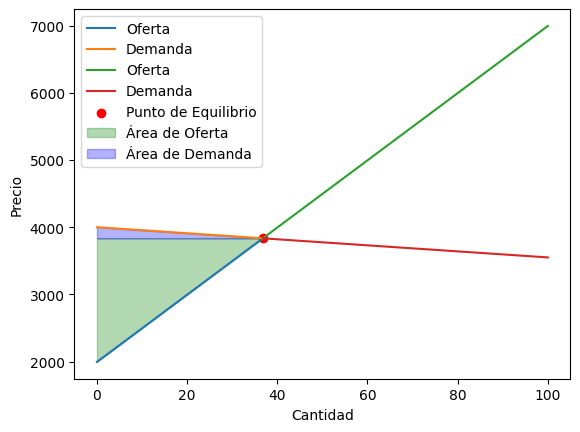

In [ ]:

from scipy.integrate import quad
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

# Constantes
a = 50
b = 1995
c = -4.5
d = 4000

# Funciones de oferta y demanda
def funcion_oferta(x):
    return a * x + b

def funcion_demanda(x):
    return c * x + d

# Función de intersección
def interseccion(x):
    return funcion_oferta(x) - funcion_demanda(x)

# Encontrar el punto de intersección
punto_interseccion = fsolve(interseccion, 0)[0]


# Encontrar el precio de equilibrio
precio_equilibrio = funcion_demanda(punto_interseccion)

print(f"Precio de equilibrio:{precio_equilibrio}")

# Calcular el valor de la función de oferta en el punto de intersección
oferta_en_interseccion = funcion_oferta(punto_interseccion)

# Calcular el valor de la función de demanda en el punto de intersección
demanda_en_interseccion = funcion_demanda(punto_interseccion)

# Definir las funciones constantes para integrar
def constante_oferta(x):
    return oferta_en_interseccion

def constante_demanda(x):
    return demanda_en_interseccion

# Definir límites para sombrear las áreas bajo las curvas
x_vals_left = np.linspace(0, punto_interseccion, 100)
x_vals_right = np.linspace(punto_interseccion, 100, 10)

# Realizar las integrales
resultado_integral_oferta_left, _ = quad(constante_oferta, 0, punto_interseccion)
resultado_integral_demanda_left, _ = quad(constante_demanda, 0, punto_interseccion)

print(f"Exceso de oferta:{resultado_integral_oferta_left}")
print(f"Exceso de demanda: {resultado_integral_demanda_left}")

# Graficar las funciones de oferta y demanda
plt.plot(x_vals_left, funcion_oferta(x_vals_left), label='Oferta')
plt.plot(x_vals_left, funcion_demanda(x_vals_left), label='Demanda')
plt.plot(x_vals_right, funcion_oferta(x_vals_right), label='Oferta')
plt.plot(x_vals_right, funcion_demanda(x_vals_right), label='Demanda')
# Resaltar el punto de equilibrio
plt.scatter(punto_interseccion, oferta_en_interseccion, color='red', label='Punto de Equilibrio')

# Graficar el área bajo las curvas para la región izquierda
plt.fill_between(x_vals_left, funcion_oferta(x_vals_left), oferta_en_interseccion, color='green', alpha=0.3, label='Área de Oferta')
plt.fill_between(x_vals_left, funcion_demanda(x_vals_left), demanda_en_interseccion, color='blue', alpha=0.3, label='Área de Demanda')

# Mostrar leyenda y etiquetas
plt.legend()
plt.xlabel('Cantidad')
plt.ylabel('Precio')

# Mostrar la gráfica
plt.show()




